# Physical Summary - Physical Health

## Dataset y libraries

### Library imports

In [69]:
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import folium
from shapely.geometry import LineString
import geopandas as gpd
from folium.plugins import PolyLineTextPath
import branca.colormap as cm
from datetime import datetime
from datetime import timedelta
from gettext import install
from tqdm import tqdm
import time

### Data import

In [70]:
# Importamos el Activity_Event_
with open('data_sources/simulation/physical_health/summary/physical_summary.json') as file:
    data = json.load(file)
    

## Summary

### Summary Information

In [82]:
calories_expenditure = data['physical_health']['summary']['physical_summary']['calories']['calories_expenditure_kcal_float']
calories_net_active = data['physical_health']['summary']['physical_summary']['calories']['calories_net_active_kcal_float']
calories_basal_metabolic = data['physical_health']['summary']['physical_summary']['calories']['calories_basal_metabolic_rate_kcal_float']
if calories_expenditure:
    calories_expenditure = calories_expenditure
else:
    calories_expenditure = calories_net_active + calories_basal_metabolic

if calories_expenditure is None:
    print("Calories Expenditure: No values were obtained or it is null.")
else:
    print(f"Calories Expenditure: {calories_expenditure} kcal")

total_steps = data['physical_health']['summary']['physical_summary']['distance']['steps_int']
if total_steps:
    print(f'Total Steps: {total_steps} steps.')
else:
    print('Total Steps: No values were obtained or it is null.')

traveled_distance_meters = data['physical_health']['summary']['physical_summary']['distance']['traveled_distance_meters_float']
if traveled_distance_meters:
    print(f'Traveled Distance: {round(traveled_distance_meters / 1000, 3)} km.')
else:
    print('Traveled Distance: No values were obtained or it is null.')

activity_time = data['physical_health']['summary']['physical_summary']['activity']['active_seconds_int']
if activity_time is None:
    activity_time_result = "The values ​​for the distance traveled are not available"
    
else:
    activity_time_minutes = activity_time // 60
    activity_time_seconds = activity_time % 60
    activity_time_result = f"Activity time: {activity_time_minutes}:{activity_time_seconds}."

print(activity_time_result)


hr_avg = data['physical_health']['summary']['physical_summary']['heart_rate']['hr_avg_bpm_int']
if hr_avg is None:
    print("Heart Rate Average: No values ​​were obtained or it is null.")
else:
   print(f'Heart Rate Average: {hr_avg} bpm.')


Calories Expenditure: 1578.0 kcal
Total Steps: 10580 steps.
Traveled Distance: 8.009 km.
Activity time: 200:23.
Heart Rate Average: 71 bpm.


### Distances

#### Steps

Total Steps: 10580 steps.
Activity Steps: 5100 steps.


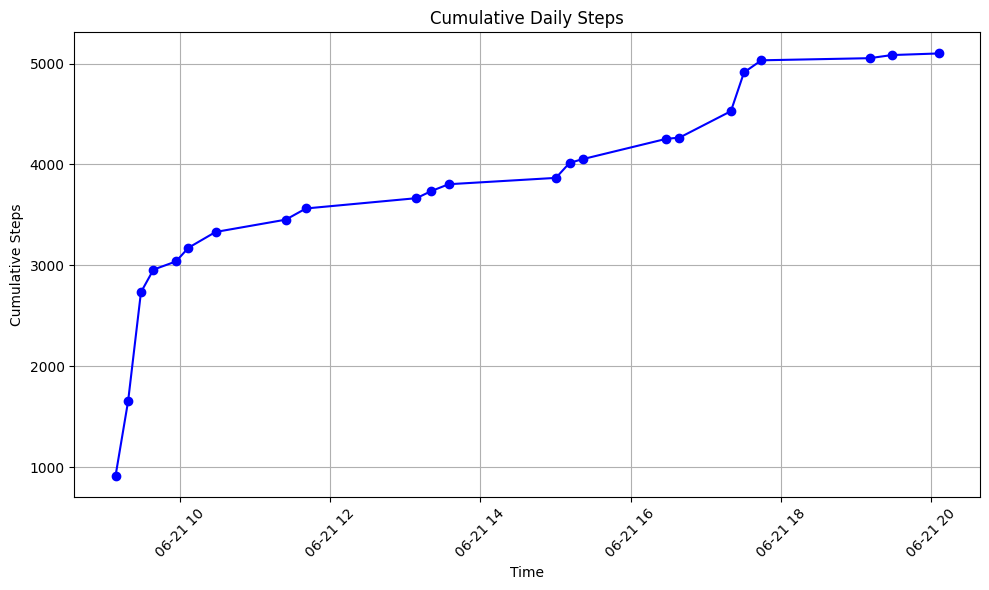

In [72]:
total_steps = data['physical_health']['summary']['physical_summary']['distance']['steps_int']
activity_steps = data['physical_health']['summary']['physical_summary']['distance']['active_steps_int']
steps_granular = data['physical_health']['summary']['physical_summary']['distance']['steps_granular_data_array']

if total_steps:
    print(f'Total Steps: {total_steps} steps.')
else:
    print('Total Steps: No values were obtained or it is null.')
    
if activity_steps:
    print(f'Activity Steps: {activity_steps} steps.')
else:
    print('Activity Steps: No values were obtained or it is null.')

if steps_granular:
    df = pd.DataFrame(steps_granular)

    # Convert datetime_string to a datetime object
    df['datetime'] = pd.to_datetime(df['datetime_string'])

    # Calculate cumulative steps
    df['cumulative_steps'] = df['steps_int'].cumsum()

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(df['datetime'], df['cumulative_steps'], marker='o', linestyle='-', color='b')
    plt.title('Cumulative Daily Steps')
    plt.xlabel('Time')
    plt.ylabel('Cumulative Steps')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()
    
else:
    # Display message instead of graphic
    plt.figure(figsize=(10, 6))
    plt.text(0.5, 0.5, 'Steps Chart: No granular information available', 
             horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.axis('off')
    plt.show()

#### Traveled

Walked Distance: 3.879 km.
Traveled Distance: 8.009 km.


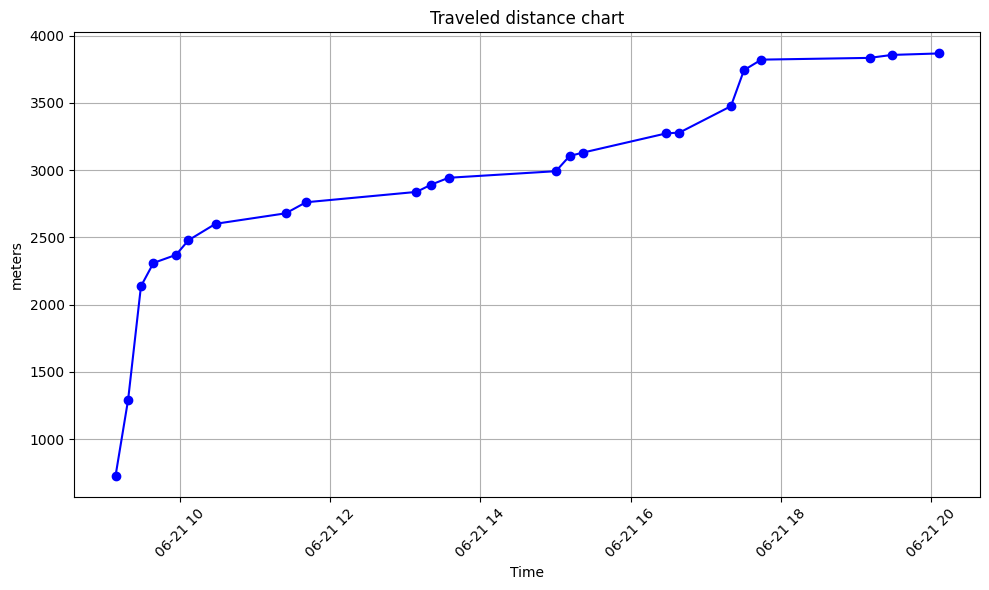

In [73]:
walked_distance_meters = data['physical_health']['summary']['physical_summary']['distance']['walked_distance_meters_float']
traveled_distance_meters = data['physical_health']['summary']['physical_summary']['distance']['traveled_distance_meters_float']
traveled_granular = data['physical_health']['summary']['physical_summary']['distance']['traveled_distance_granular_data_array']

if walked_distance_meters:
    print(f'Walked Distance: {round(walked_distance_meters / 1000, 3)} km.')
else:
    print('Walked Distance: No values were obtained or it is null.')
    
if traveled_distance_meters:
    print(f'Traveled Distance: {round(traveled_distance_meters / 1000, 3)} km.')
else:
    print('Traveled Distance: No values were obtained or it is null.')

if traveled_granular:
    df = pd.DataFrame(traveled_granular)

    # Convert datetime_string to a datetime object
    df['datetime'] = pd.to_datetime(df['datetime_string'])

    # Calculate cumulative steps
    df['cumulative_meters'] = df['traveled_distance_meters_float'].cumsum()

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(df['datetime'], df['cumulative_meters'], marker='o', linestyle='-', color='b')
    plt.title('Traveled distance chart')
    plt.xlabel('Time')
    plt.ylabel('meters')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()
    
else:
    # Display message instead of graphic
    plt.figure(figsize=(10, 6))
    plt.text(0.5, 0.5, 'Traveled distance chart: No granular information available', 
             horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.axis('off')
    plt.show()

#### Elevation

Elevation Average: No values were obtained or it is null.
Elevation Min: No values were obtained or it is null.
Elevation Max: No values were obtained or it is null.
Elevation Loss: No values were obtained or it is null.
Elevation Gain: No values were obtained or it is null.


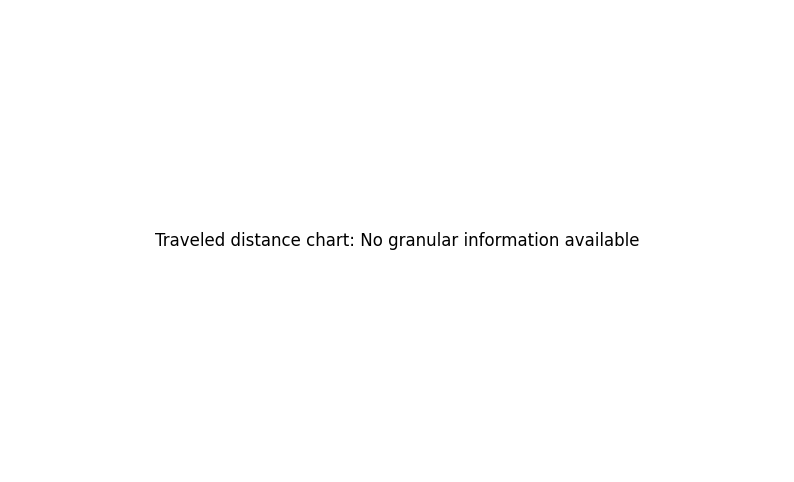

In [78]:
elevation_avg_meters = data['physical_health']['summary']['physical_summary']['distance']['elevation_avg_altitude_meters_float']
elevation_min_meters = data['physical_health']['summary']['physical_summary']['distance']['elevation_minimum_altitude_meters_float']
elevation_max_meters = data['physical_health']['summary']['physical_summary']['distance']['elevation_maximum_altitude_meters_float']
elevation_loss_meters = data['physical_health']['summary']['physical_summary']['distance']['elevation_loss_actual_altitude_meters_float']
elevation_gain_meters = data['physical_health']['summary']['physical_summary']['distance']['elevation_gain_actual_altitude_meters_float']
elevation_granular = data['physical_health']['summary']['physical_summary']['distance']['elevation_granular_data_array']

if elevation_avg_meters:
    print(f'Elevation Average: {elevation_avg_meters} m.')
else:
    print('Elevation Average: No values were obtained or it is null.')
    
if elevation_min_meters:
    print(f'Elevation Min: {elevation_min_meters} m.')
else:
    print('Elevation Min: No values were obtained or it is null.')

if elevation_max_meters:
    print(f'Elevation Max: {elevation_max_meters} m.')
else:
    print('Elevation Max: No values were obtained or it is null.')
    
if elevation_loss_meters:
    print(f'Elevation Loss: {elevation_loss_meters} m.')
else:
    print('Elevation Loss: No values were obtained or it is null.')

if elevation_gain_meters:
    print(f'Elevation Gain: {elevation_gain_meters} m.')
else:
    print('Elevation Gain: No values were obtained or it is null.')

if elevation_granular:
    datetimes = [datetime.fromisoformat(item['datetime_string']) for item in elevation_granular]
    elevation = [item['elevation_change_meters_float'] for item in elevation_granular]

    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(datetimes, elevation, linestyle='-')
    plt.title('elevation Chart')
    plt.xlabel('Time')
    plt.ylabel('meters')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
else:
    # Display message instead of graphic
    plt.figure(figsize=(10, 6))
    plt.text(0.5, 0.5, 'Traveled distance chart: No granular information available', 
             horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.axis('off')
    plt.show()

#### Floor

Floors Climbed: 10.0 floors.


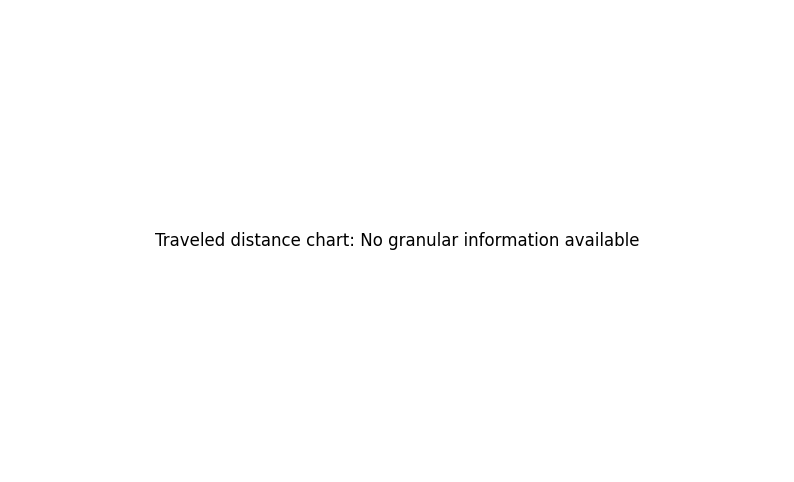

In [79]:
floors_climbed = data['physical_health']['summary']['physical_summary']['distance']['floors_climbed_float']
floors_climbed_granular = data['physical_health']['summary']['physical_summary']['distance']['floors_climbed_granular_data_array']

if floors_climbed:
    print(f'Floors Climbed: {floors_climbed} floors.')
else:
    print('Floors Climbed: No values were obtained or it is null.')

if floors_climbed_granular:
    df = pd.DataFrame(floors_climbed_granular)

    # Convert datetime_string to a datetime object
    df['datetime'] = pd.to_datetime(df['datetime_string'])

    # Calculate cumulative steps
    df['cumulative_floors'] = df['floors_climbed_float'].cumsum()

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(df['datetime'], df['cumulative_floors'], marker='o', linestyle='-', color='b')
    plt.title('Floors Climbed chart')
    plt.xlabel('Time')
    plt.ylabel('Floors')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()
    
else:
    # Display message instead of graphic
    plt.figure(figsize=(10, 6))
    plt.text(0.5, 0.5, 'Traveled distance chart: No granular information available', 
             horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.axis('off')
    plt.show()

#### Swimming

Swimming Strokes: No values were obtained or it is null.
Swimming Laps: No values were obtained or it is null.
Swimming Distance: No values were obtained or it is null.


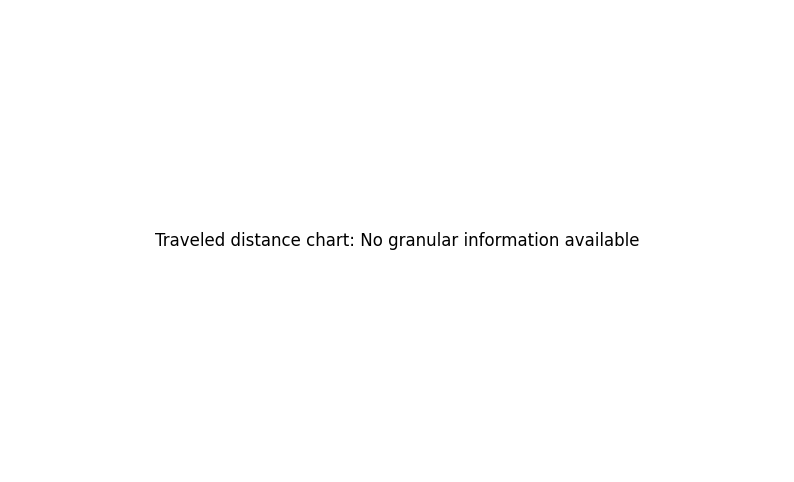

In [80]:
swimming_strokes = data['physical_health']['summary']['physical_summary']['distance']['swimming_num_strokes_float']
swimming_laps = data['physical_health']['summary']['physical_summary']['distance']['swimming_num_laps_int']
swimming_total_meters = data['physical_health']['summary']['physical_summary']['distance']['swimming_total_distance_meters_float']
swimming_granular = data['physical_health']['summary']['physical_summary']['distance']['swimming_distance_granular_data_array']

if swimming_strokes:
    print(f'Swimming Strokes: {swimming_strokes} strokes.')
else:
    print('Swimming Strokes: No values were obtained or it is null.')
    
if swimming_laps:
    print(f'Swimming Laps: {swimming_laps} laps.')
else:
    print('Swimming Laps: No values were obtained or it is null.')
    
if swimming_total_meters:
    print(f'Swimming Distance: {round(swimming_total_meters / 1000, 3)} km.')
else:
    print('Swimming Distance: No values were obtained or it is null.')

if swimming_granular:
    df = pd.DataFrame(swimming_granular)

    # Convert datetime_string to a datetime object
    df['datetime'] = pd.to_datetime(df['datetime_string'])

    # Calculate cumulative steps
    df['cumulative_swimming'] = df['swimming_distance_meters_float'].cumsum()

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(df['datetime'], df['cumulative_swimming'], marker='o', linestyle='-', color='b')
    plt.title('Swimming distance chart')
    plt.xlabel('Time')
    plt.ylabel('meters')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()
    
else:
    # Display message instead of graphic
    plt.figure(figsize=(10, 6))
    plt.text(0.5, 0.5, 'Traveled distance chart: No granular information available', 
             horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.axis('off')
    plt.show()

### Oxygenation

Saturation Average: No values were obtained or it is null
vo2max: No values were obtained or it is null


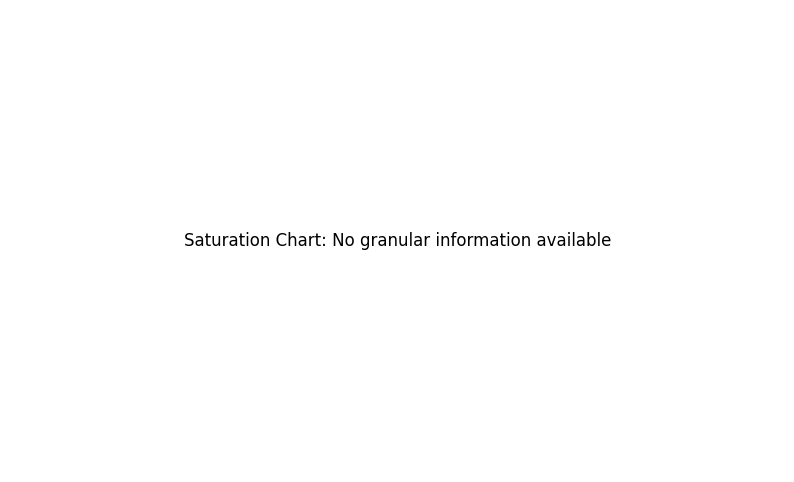

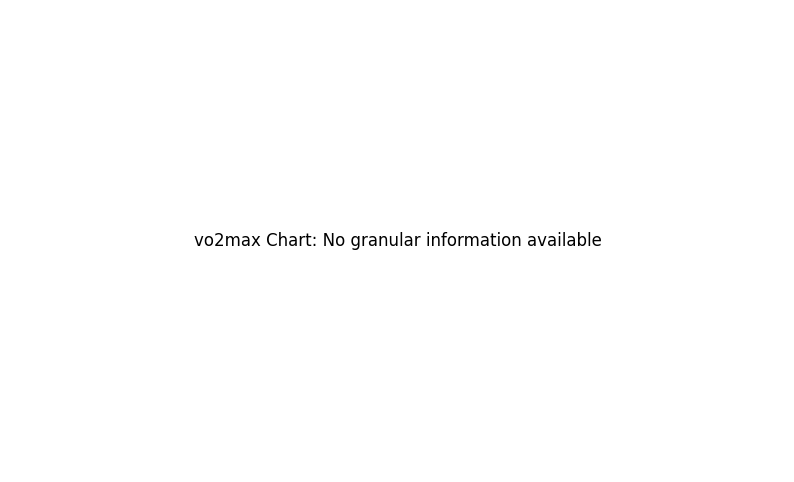

In [74]:
saturation_avg = data['physical_health']['summary']['physical_summary']['oxygenation']['saturation_avg_percentage_int']
saturation_granular = data['physical_health']['summary']['physical_summary']['oxygenation']['saturation_granular_data_array']
vo2max_ml = data['physical_health']['summary']['physical_summary']['oxygenation']['vo2max_mL_per_min_per_kg_int']
vo2max_granular = data['physical_health']['summary']['physical_summary']['oxygenation']['vo2_granular_data_array']

# Checking the average saturation value
if saturation_avg is not None and saturation_avg > 0:
    print(f"Saturation Average: {saturation_avg}%")
else:
    print("Saturation Average: No values were obtained or it is null")

# Checking the average saturation value
if vo2max_ml is not None and vo2max_ml > 0:
    print(f"vo2max: {vo2max_ml} mL/min/kg")
else:
    print("vo2max: No values were obtained or it is null")

# Creating a DataFrame for the granular data
if saturation_granular:
    df = pd.DataFrame(saturation_granular)
    df['datetime_string'] = pd.to_datetime(df['datetime_string'])
    
    # Plotting the bar chart for saturation
    plt.figure(figsize=(10, 6))
    plt.plot(df['datetime_string'], df['saturation_percentage_int'], color='blue', label='Saturation %')
    plt.ylim(0, 100)
    plt.title('Oxygenation Saturation Over Time')
    plt.xlabel('Time')
    plt.ylabel('Saturation %')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    # Display message instead of graphic
    plt.figure(figsize=(10, 6))
    plt.text(0.5, 0.5, 'Saturation Chart: No granular information available', 
             horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.axis('off')
    plt.show()
    
datetimes = [datetime.fromisoformat(item['datetime_string']) for item in vo2max_granular]
vo2max = [item['vo2_mL_per_min_per_kg_int'] for item in vo2max_granular]

if vo2max_granular:
    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(datetimes, vo2max, linestyle='-')
    plt.title('Vo2max over time')
    plt.xlabel('Time')
    plt.ylabel('vo2max')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
else:
    # Display message instead of graphic
    plt.figure(figsize=(10, 6))
    plt.text(0.5, 0.5, 'vo2max Chart: No granular information available', 
             horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.axis('off')
    plt.show()

### Calories

Calories Expenditure: 1578.0 kcal
Calories Net Active: 266.0 kcal
Calories Basal Metabolic: 1312.0 kcal
Calories Net Intake: No values were obtained or it is null.


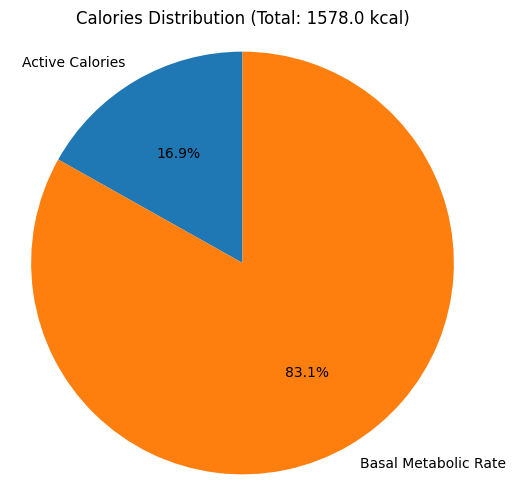

In [75]:
calories_net_inteke = data['physical_health']['summary']['physical_summary']['calories']['calories_net_intake_kcal_float']
calories_expenditure = data['physical_health']['summary']['physical_summary']['calories']['calories_expenditure_kcal_float']
calories_net_active = data['physical_health']['summary']['physical_summary']['calories']['calories_net_active_kcal_float']
calories_basal_metabolic = data['physical_health']['summary']['physical_summary']['calories']['calories_basal_metabolic_rate_kcal_float']

if calories_expenditure:
    calories_expenditure = calories_expenditure
else:
    calories_expenditure = calories_net_active + calories_basal_metabolic

if calories_expenditure is None:
    print("Calories Expenditure: No values were obtained or it is null.")
else:
    print(f"Calories Expenditure: {calories_expenditure} kcal")
    
if calories_net_active:
    print(f"Calories Net Active: {calories_net_active} kcal")
else:
    print("Calories Net Active: No values were obtained or it is null.")
    
if calories_basal_metabolic:
    print(f"Calories Basal Metabolic: {calories_basal_metabolic} kcal")
else:
    print("Calories Basal Metabolic: No values were obtained or it is null.")
    
if calories_net_inteke:
    print(f"Calories Net Intake: {calories_net_inteke} kcal")
else:
    print("Calories Net Intake: No values were obtained or it is null.")

# Check if data is valid for the pie chart
if calories_net_active is not None and calories_basal_metabolic is not None and calories_expenditure is not None:
    # Data for pie chart
    labels = ['Active Calories', 'Basal Metabolic Rate']
    sizes = [calories_net_active, calories_basal_metabolic]
    total = calories_expenditure

    # Create pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct=lambda p: '{:.1f}%'.format(p), startangle=90)
    plt.title(f'Calories Distribution (Total: {total} kcal)')
    plt.axis('equal')  # Ensures the pie chart is a circle
    plt.show()

else:
        # Display message instead of graphic
    plt.figure(figsize=(10, 6))
    plt.text(0.5, 0.5, 'Blood Glucose Chart: No granular information available', 
             horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.axis('off')
    plt.show()


### Heart Rate

Heart Rate Average: 71 bpm.
Heart Rate Maximus: 114 bpm.
Heart Rate Minimus: 45 bpm.


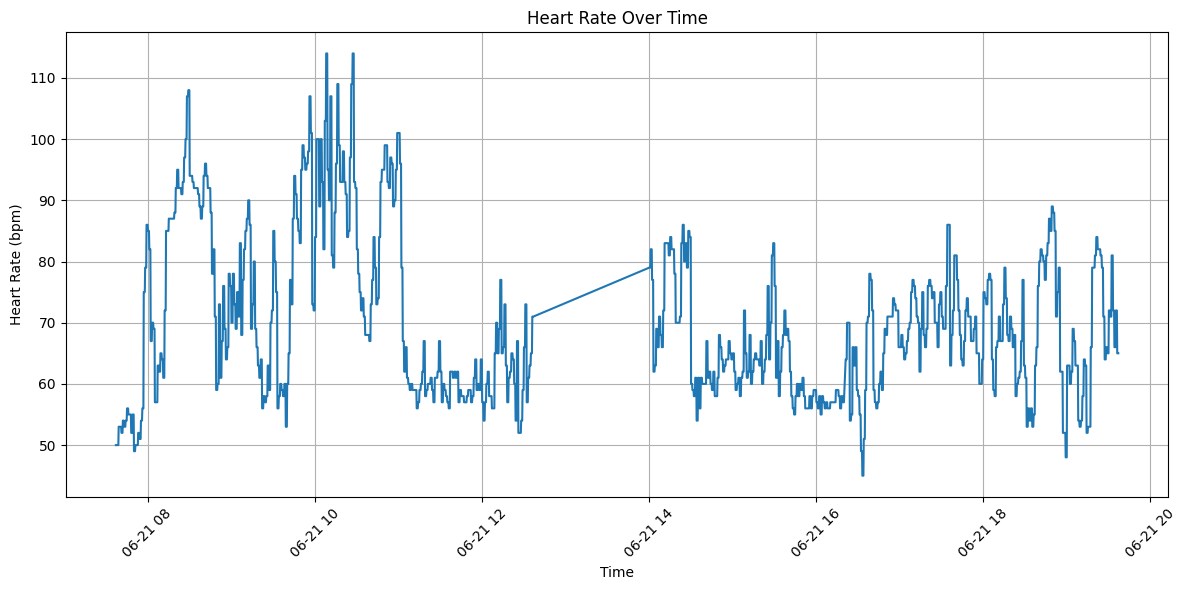

In [76]:
hr_avg = data['physical_health']['summary']['physical_summary']['heart_rate']['hr_avg_bpm_int']
hr_max = data['physical_health']['summary']['physical_summary']['heart_rate']['hr_maximum_bpm_int']
hr_min = data['physical_health']['summary']['physical_summary']['heart_rate']['hr_minimum_bpm_int']
hr_granular = data['physical_health']['summary']['physical_summary']['heart_rate']['hr_granular_data_array']

# HR avg
if hr_avg is None:
    hr_avg_result = "Heart Rate Average: No values ​​were obtained or it is null."
else:
    hr_avg_result = f'Heart Rate Average: {hr_avg} bpm.'

# HR maximus
if hr_max is None:
    hr_max_result = "Heart Rate Maximus: No values ​​were obtained or it is null."
else:
    hr_max_result = f'Heart Rate Maximus: {hr_max} bpm.'
    
# HR minimus
if hr_min is None:
    hr_min_result = "Heart Rate Minimus: No values ​​were obtained or it is null."
else:
    hr_min_result = f'Heart Rate Minimus: {hr_min} bpm.'

print(hr_avg_result)
print(hr_max_result)
print(hr_min_result)

# Prepare data for plotting
datetimes = [datetime.fromisoformat(item['datetime_string']) for item in hr_granular]
heart_rates = [item['hr_bpm_int'] for item in hr_granular]

if hr_granular:
    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(datetimes, heart_rates, linestyle='-')
    plt.title('Heart Rate Over Time')
    plt.xlabel('Time')
    plt.ylabel('Heart Rate (bpm)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
else:
    # Display message instead of graphic
    plt.figure(figsize=(10, 6))
    plt.text(0.5, 0.5, 'Heart Reate Chart: No granular information available', 
             horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.axis('off')
    plt.show()

### Stress

Stress Average: 28%
Stress max: 99%


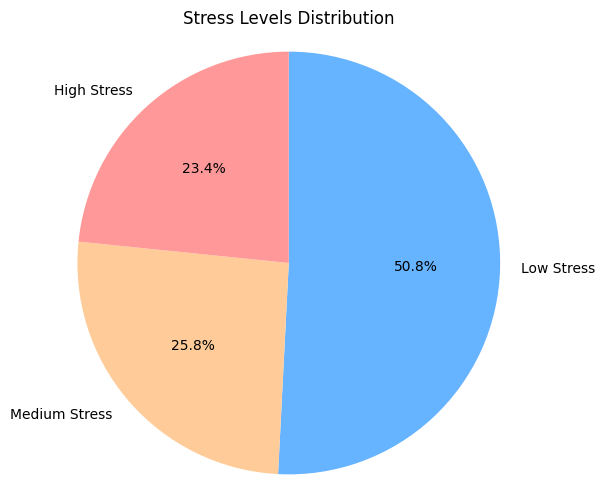

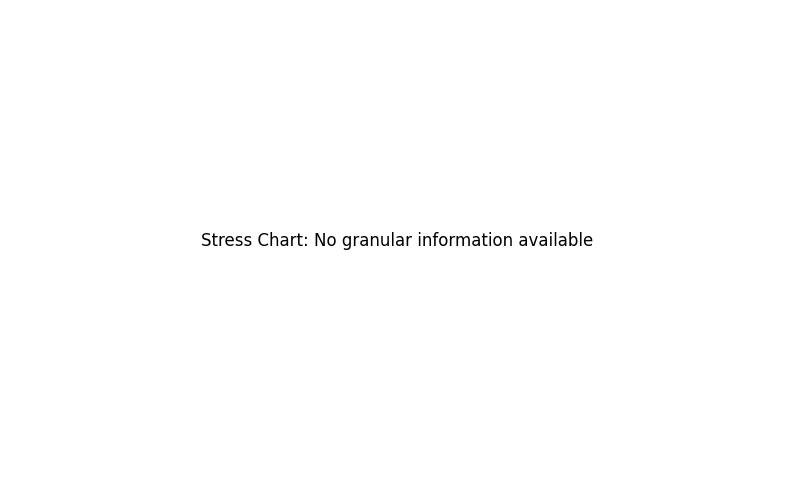

In [77]:
stress_at_rest = data['physical_health']['summary']['physical_summary']['stress']['stress_at_rest_duration_seconds_int']
stress_duration = data['physical_health']['summary']['physical_summary']['stress']['stress_duration_seconds_int']
low_stress = data['physical_health']['summary']['physical_summary']['stress']['low_stress_duration_seconds_int']
medium_stress = data['physical_health']['summary']['physical_summary']['stress']['medium_stress_duration_seconds_int']
high_stress = data['physical_health']['summary']['physical_summary']['stress']['high_stress_duration_seconds_int']
stress_granular = data['physical_health']['summary']['physical_summary']['stress']['stress_granular_data_array']
stress_avg = data['physical_health']['summary']['physical_summary']['stress']['stress_avg_level_int']
stress_max = data['physical_health']['summary']['physical_summary']['stress']['stress_maximum_level_int']

# Check stress avg
if stress_max is None:
    stress_avg_result = "Stress Average: No values ​​were obtained or it is null."

else:
    stress_avg_result = f"Stress Average: {stress_avg}%"

# Check stress avg
if stress_max is None:
    stress_max_result = "Stress max: No values ​​were obtained or it is null."

else:
    stress_max_result = f"Stress max: {stress_max}%"
    
print(stress_avg_result)
print(stress_max_result)

# Calculate total stress duration
total_stress_duration = stress_duration

# Calculate percentages for each stress level
low_stress_percentage = (low_stress / total_stress_duration) * 100
medium_stress_percentage = (medium_stress / total_stress_duration) * 100
high_stress_percentage = (high_stress / total_stress_duration) * 100

# Data for the pie chart
labels = ['Low Stress', 'Medium Stress', 'High Stress']
sizes = [low_stress_percentage, medium_stress_percentage, high_stress_percentage]
colors = ['#66b3ff', '#ffcc99', '#ff9999']

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Stress Levels Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the chart
plt.show()

# Display summary data as percentages
summary_data = {
    "Low Stress Percentage": low_stress_percentage,
    "Medium Stress Percentage": medium_stress_percentage,
    "High Stress Percentage": high_stress_percentage
}

# Check if there is data in stress_granular
if stress_granular:
    # Convert data to a DataFrame
    stress_granular_df = pd.DataFrame(stress_granular)
    stress_granular_df['datetime'] = pd.to_datetime(stress_granular_df['datetime_string'])

    # Create the chart
    plt.figure(figsize=(10, 6))
    plt.plot(stress_granular_df['datetime'], stress_granular_df['tss_score_int'], marker='o', color='b', label='TSS Score')

    # Setting up labels and title
    plt.title('Stress Over Time')
    plt.xlabel('Time')
    plt.ylabel('Stress Level')
    plt.xticks(rotation=45)
    plt.legend()

    # Show the graphic
    plt.tight_layout()
    plt.show()
else:
    # Display message instead of graphic
    plt.figure(figsize=(10, 6))
    plt.text(0.5, 0.5, 'Stress Chart: No granular information available', 
             horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.axis('off')
    plt.show()
